**Finding and reading data related to transportation**

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import re

import importlib
import EDA_functions as EDA_functions
importlib.reload(EDA_functions)
from EDA_functions import *

scaler_mm = MinMaxScaler()
scaler_ss = StandardScaler()

clean_path = '../../data/processed_data/'
raw_path = '../../data/raw_data/'

For-hire motor carrier freight services price index, monthly

Source: Stats Canada
Table: 18-10-0281-01

*This data only goes as far back as January 2007

In [29]:
tpi = pd.read_csv(raw_path+'transportation_pi.csv', header=0, index_col=0, skiprows=9, skipfooter=16, on_bad_lines='skip', engine='python')
tpi.index = tpi.index.rename('Date')
tpi.drop(tpi.index[0:2], inplace=True)

tpi.index = pd.to_datetime(tpi.index, format='%B %Y')
tpi = tpi.apply(pd.to_numeric)

tpi_s = ss_scale_a_df(tpi, 'MS')

tpi.head()

,Truck transportation,General freight trucking,"General freight trucking, local","General freight trucking, long distance",Specialized freight trucking,Used household and office goods moving,"Specialized freight (except used goods) trucking, local","Specialized freight (except used goods) trucking, long distance"
Date,,,,,,,,
2007-01-01,78.1,73.9,73.8,74.6,87.2,70.4,105.2,81.9
2007-02-01,77.8,73.6,73.1,74.4,87.0,70.6,105.1,81.8
2007-03-01,78.1,73.8,72.4,74.8,87.3,70.6,105.3,82.0
2007-04-01,78.3,74.0,73.1,74.9,87.5,70.9,104.9,82.6
2007-05-01,78.1,73.7,73.1,74.6,87.4,71.1,104.9,82.4


In [30]:
tpi_start_date = tpi.index[0]
tpi_end_date = tpi.index[-1]

tpi_start_date, tpi_end_date

(Timestamp('2007-01-01 00:00:00'), Timestamp('2023-11-01 00:00:00'))

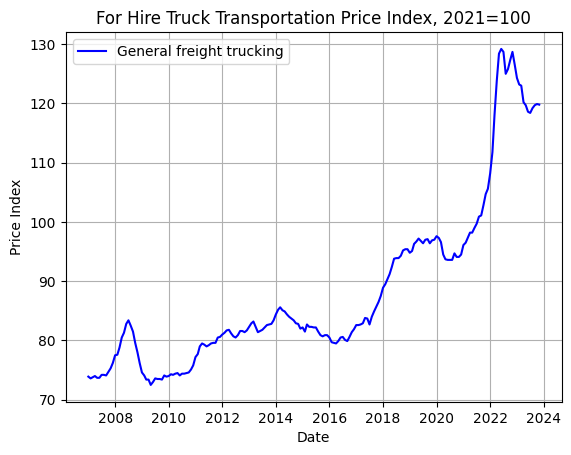

In [31]:
plot_targets(dfs = [tpi['General freight trucking']],
            num_targets = 1,
            legend_labels = ['General freight trucking'],
            colors = ['blue'],
            title='For Hire Truck Transportation Price Index, 2021=100',
            xlabel='Date',
            ylabel='Price Index',
            legend_tf='True',
            grid_tf='True')

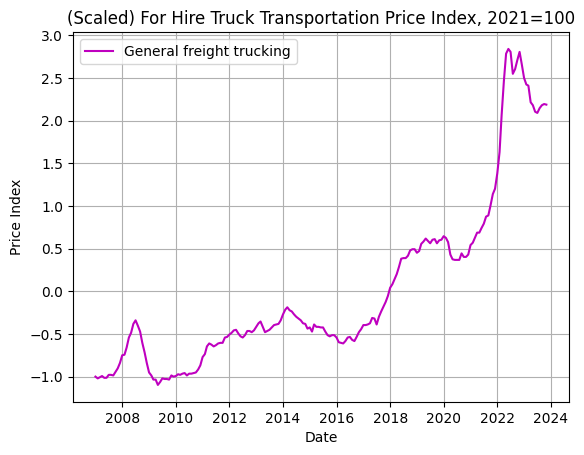

In [32]:
plot_targets(dfs = [tpi_s.iloc[:,1]],
            num_targets = 1,
            legend_labels = ['General freight trucking'],
            colors = ['m'],
            title='(Scaled) For Hire Truck Transportation Price Index, 2021=100',
            xlabel='Date',
            ylabel='Price Index',
            legend_tf='True',
            grid_tf='True')

Average weekly earnings by industry (filtered for rail and truck transport)
Source: Stats Canada

*Annual data (2001-2022)

In [33]:
avg_earn_tpt = pd.read_csv(raw_path+'transportation_wages.csv', header=0, index_col=0, skiprows=11, on_bad_lines='skip', skipfooter=25, engine='python', thousands=',', na_values='F')
avg_earn_tpt.index = avg_earn_tpt.index.rename('Date')
avg_earn_tpt.drop(avg_earn_tpt.index[0:2], inplace=True)

avg_earn_tpt.index = pd.to_datetime(avg_earn_tpt.index, format='%Y')
avg_earn_tpt = avg_earn_tpt.apply(pd.to_numeric)

avg_earn_tpt.head()

,Rail transportation,Truck transportation,General freight trucking,Specialized freight trucking,Support activities for rail transportation,Support activities for road transportation,Freight transportation arrangement
Date,,,,,,,
2001-01-01,874.50,687.09,689.28,684.32,760.20,658.70,1007.24
2002-01-01,887.52,685.07,682.86,687.91,746.31,689.49,982.99
2003-01-01,994.63,701.94,697.13,708.13,812.66,694.57,985.66
2004-01-01,1032.96,727.45,714.89,743.52,883.90,758.32,1011.51
2005-01-01,1056.97,776.17,756.67,801.79,872.00,805.16,976.10


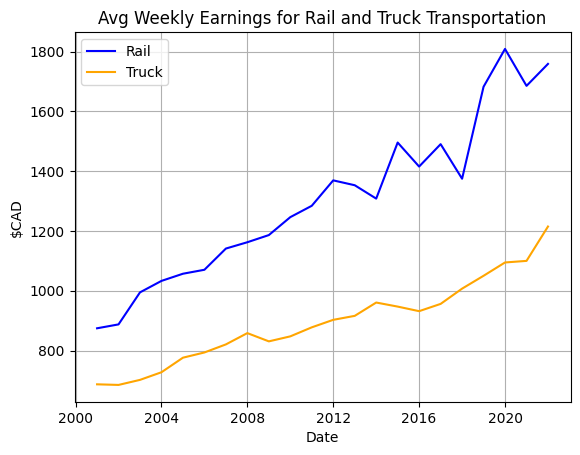

In [34]:
plot_targets([avg_earn_tpt['Rail transportation'], avg_earn_tpt['Truck transportation']],
             2,
             ['Rail', 'Truck'],
             ['blue', 'orange'],
             'Avg Weekly Earnings for Rail and Truck Transportation',
             'Date',
             '$CAD',
             'True',
             'True')

In [35]:
avg_earn_tpt_s = ss_scale_a_df(avg_earn_tpt, 'MS')

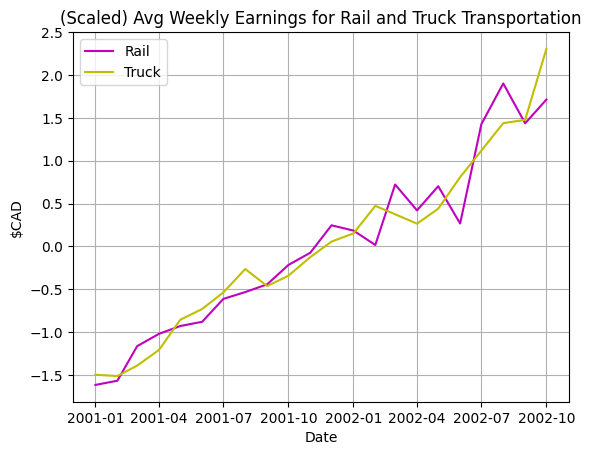

In [36]:
plot_targets([avg_earn_tpt_s.iloc[:,0], avg_earn_tpt_s.iloc[:,1]],
             2,
             ['Rail', 'Truck'],
             ['m', 'y'],
             '(Scaled) Avg Weekly Earnings for Rail and Truck Transportation',
             'Date',
             '$CAD',
             'True',
             'True')

GDP for Rail Transport

Source: Stats Canada

1997-01-01 to 2024-03-01

In [37]:
gdp_rail = pd.read_csv(raw_path+'rail_gdp.csv', header=0, index_col=0, skiprows=11, on_bad_lines='skip', skipfooter=10, engine='python', thousands=',', na_values='F')
gdp_rail.index = gdp_rail.index.rename('Date')
gdp_rail.drop(gdp_rail.index[0:2], inplace=True)

gdp_rail.columns = [remove_reg(col) for col in gdp_rail.columns]

gdp_rail.index = pd.to_datetime(gdp_rail.index, format='%B %Y')
gdp_rail = gdp_rail.apply(pd.to_numeric)

gdp_rail_s = ss_scale_a_df(gdp_rail, 'MS')

gdp_rail.head()

,Rail transportation
Date,
1997-01-01,5112
1997-02-01,5258
1997-03-01,5327
1997-04-01,5469
1997-05-01,5618


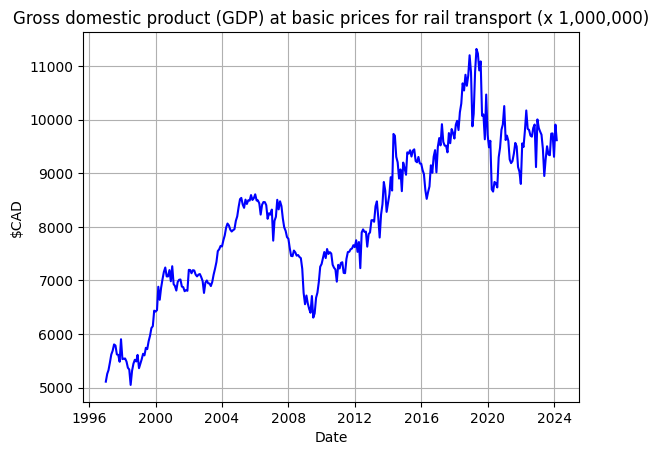

In [38]:
plot_targets([gdp_rail],
             1,
             'Rail',
             'blue',
             'Gross domestic product (GDP) at basic prices for rail transport (x 1,000,000)',
             'Date',
             '$CAD',
             'False',
             'True')

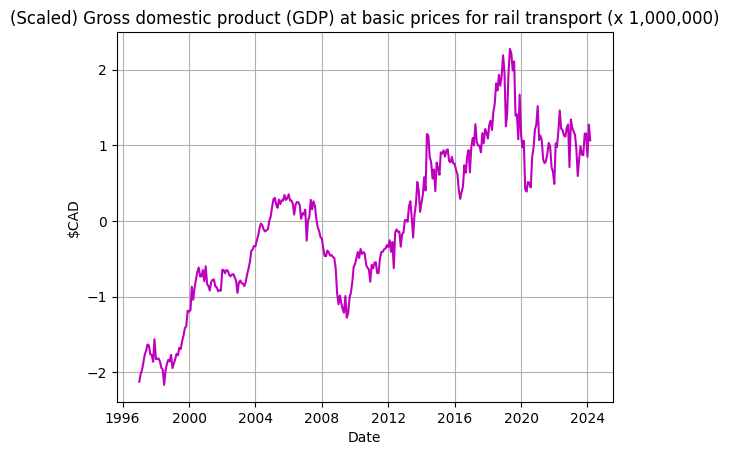

In [39]:
plot_targets([gdp_rail_s],
             1,
             'Rail',
             'm',
             '(Scaled) Gross domestic product (GDP) at basic prices for rail transport (x 1,000,000)',
             'Date',
             '$CAD',
             'False',
             'True')

GDP for Truck Transport

Source: Stats Canada

1997-01-01 to 2024-03-01

In [40]:
gdp_truck = pd.read_csv(raw_path+'truck_gdp.csv', header=0, index_col=0, skiprows=11, on_bad_lines='skip', skipfooter=10, engine='python', thousands=',', na_values='F')
gdp_truck.index = gdp_truck.index.rename('Date')
gdp_truck.drop(gdp_truck.index[0:2], inplace=True)

gdp_truck.columns = [remove_reg(col) for col in gdp_truck.columns]

gdp_truck.index = pd.to_datetime(gdp_truck.index, format='%B %Y')
gdp_truck = gdp_truck.apply(pd.to_numeric)

gdp_truck_s = ss_scale_a_df(gdp_truck, 'MS')

gdp_truck.head()

,Truck transportation
Date,
1997-01-01,9797
1997-02-01,9917
1997-03-01,9992
1997-04-01,10267
1997-05-01,10367


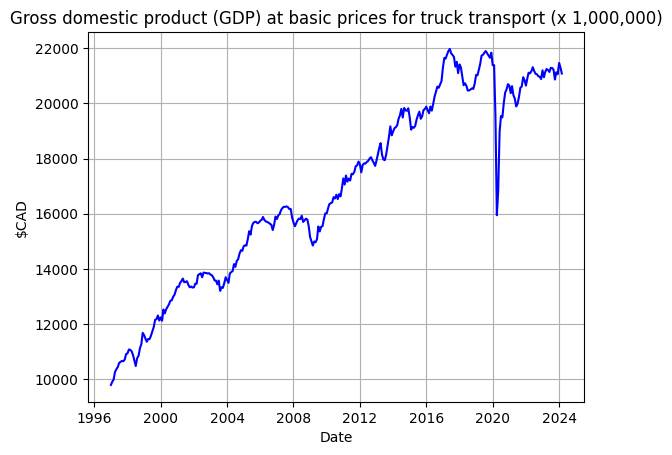

In [41]:
plot_targets([gdp_truck],
             1,
             'T',
             'blue',
             'Gross domestic product (GDP) at basic prices for truck transport (x 1,000,000)',
             'Date',
             '$CAD',
             'False',
             'True')

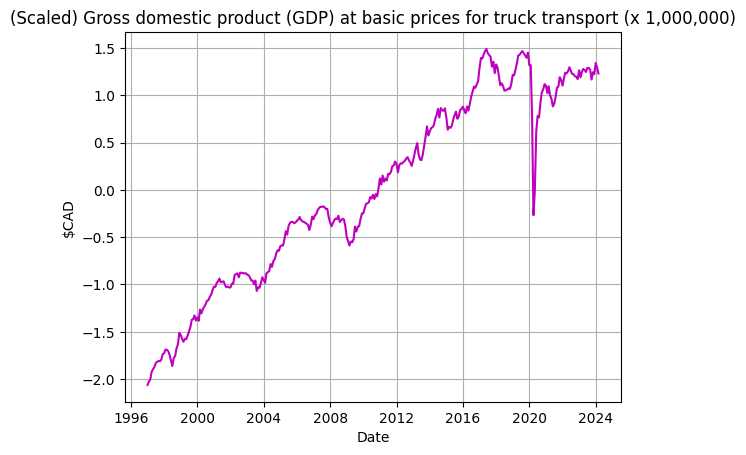

In [42]:
plot_targets([gdp_truck_s],
             1,
             'T',
             'm',
             '(Scaled) Gross domestic product (GDP) at basic prices for truck transport (x 1,000,000)',
             'Date',
             '$CAD',
             'False',
             'True')

Freight Rail Services Price Index; Filtered into commodity, in this case grain and fertilizer transport are of interest

Stats Canada

2018-01-01 to 2024-05-01


In [43]:
frpi = pd.read_csv(raw_path+'rail_price_index.csv', header=0, index_col=0, skiprows=9, on_bad_lines='skip', skipfooter=10, engine='python', thousands=',', na_values='F')
frpi.index = frpi.index.rename('Date')
frpi.drop(frpi.index[0:2], inplace=True)

frpi.columns = [remove_reg(col) for col in frpi.columns]

frpi.index = pd.to_datetime(frpi.index, format='%B %Y')
frpi = frpi.apply(pd.to_numeric)

frpi_s = ss_scale_a_df(frpi, 'MS')

frpi.head()

,Freight Rail Services Price Index,Grain and fertilizer
Date,,
2018-01-01,95.0,97.1
2018-02-01,95.7,97.6
2018-03-01,96.9,99.0
2018-04-01,96.4,98.6
2018-05-01,96.9,98.8


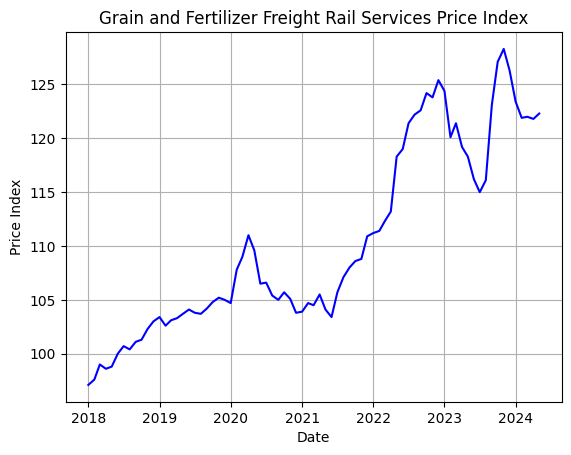

In [44]:
plot_targets([frpi.iloc[:,1]],
             1,
             'T',
             'blue',
             'Grain and Fertilizer Freight Rail Services Price Index',
             'Date',
             'Price Index',
             'False',
             'True')

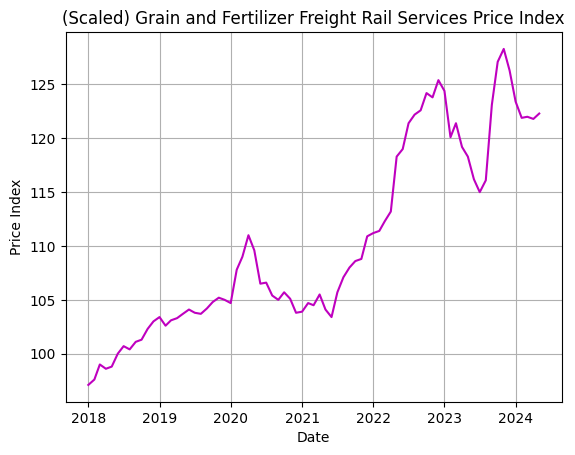

In [45]:
plot_targets([frpi.iloc[:,1]],
             1,
             'T',
             'm',
             '(Scaled) Grain and Fertilizer Freight Rail Services Price Index',
             'Date',
             'Price Index',
             'False',
             'True')

Diesel and gas prices

In [46]:
dgpi = pd.read_csv(raw_path+'diesel_and_gas.csv', header=0, index_col=0, skiprows=9, on_bad_lines='skip', skipfooter=15, engine='python', thousands=',', na_values='..')
dgpi.drop(dgpi.index[0:2], inplace=True)
dgpi = dgpi.apply(pd.to_numeric)
dgpi.index = pd.to_datetime(dgpi.index, format='%B %Y')

In [47]:
diesel_cols = []
for i in range(2, dgpi.shape[1], 3):
    diesel_cols.append(dgpi.iloc[:,i])

diesel_cols = pd.concat(diesel_cols, axis=1)
diesel_cols = diesel_cols.apply(pd.to_numeric, errors='coerce')

diesel_cols.index = diesel_cols.index.rename('Date')

In [48]:
dpi = diesel_cols.sum(axis=1)
dpi

Date
1990-01-01     630.0
1990-02-01     631.8
1990-03-01     631.9
1990-04-01     637.1
1990-05-01     640.2
               ...  
2023-12-01    3064.5
2024-01-01    2973.3
2024-02-01    3064.0
2024-03-01    3026.5
2024-04-01    3055.3
Length: 412, dtype: float64

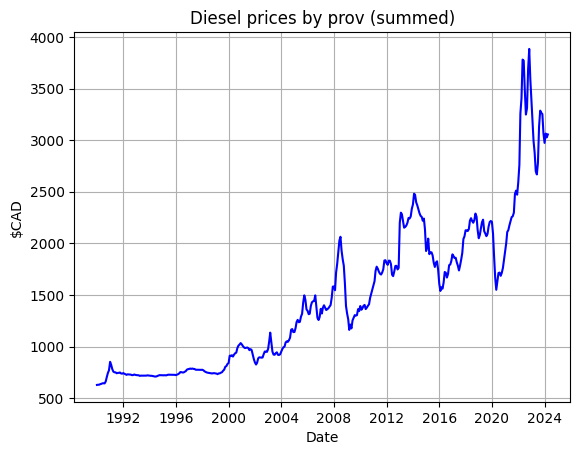

In [49]:
plot_targets([dpi],
             1,
             'T',
             'b',
             'Diesel prices by prov (summed)',
             'Date',
             '$CAD',
             'False',
             'True')

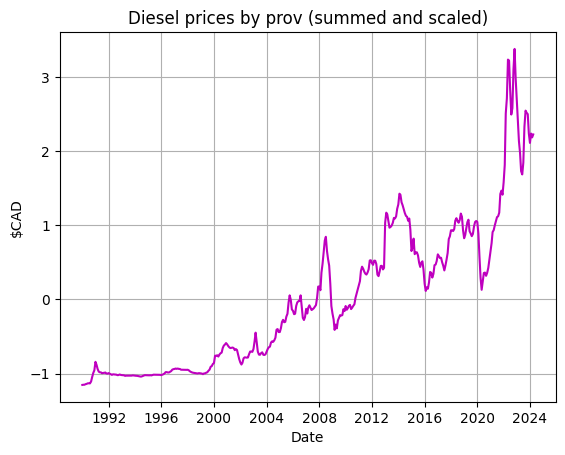

In [50]:
diesel_s = ss_scale_a_df(pd.DataFrame(dpi), 'MS')

plot_targets([diesel_s],
             1,
             'T',
             'm',
             'Diesel prices by prov (summed and scaled)',
             'Date',
             '$CAD',
             'False',
             'True')

*Saving Clean CSVs*

In [51]:
"""tpi.to_csv(clean_path+'tpi_clean.csv')
avg_earn_tpt.to_csv(clean_path+'avg_earn_tpt_clean.csv')
gdp_rail.to_csv(clean_path+'gdp_rail_clean.csv')
gdp_truck.to_csv(clean_path+'gdp_truck_clean.csv')
frpi.to_csv(clean_path+'frpi_clean.csv')
dpi.to_csv(clean_path+'dpi_clean.csv')"""


